In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import datetime
import numpy as np
from matplotlib import pyplot as plt

Przykładowy obraz:
label: 5


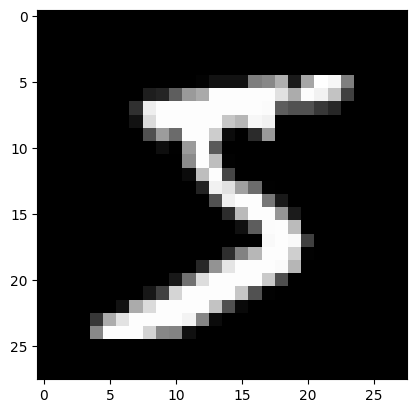

Rozmiar zbioru treningowego: (60000, 28, 28)
Rozmiar zbioru testowego: (10000, 28, 28)
(28, 28)
(28, 28, 1)


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Przykładowy obraz:\nlabel: {y_train[0]}")
plt.imshow(x_train[0], cmap='gray')
plt.show()

print("Rozmiar zbioru treningowego:", x_train.shape)
print("Rozmiar zbioru testowego:", x_test.shape)

# print(x_train[0])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train[0].shape)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train[0].shape)



log_dir_a = "logs/fit/model_A_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_b = "logs/fit/model_B_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_a = tf.keras.callbacks.TensorBoard(log_dir=log_dir_a, histogram_freq=1)
tensorboard_callback_b = tf.keras.callbacks.TensorBoard(log_dir=log_dir_b, histogram_freq=1)


In [ ]:
model_A = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_A.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_A.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       123,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,066 (504.16 KB)

 Trainable params: 129,066 (504.16 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model_B = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_B.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_B.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,074 (687.79 KB)

 Trainable params: 176,074 (687.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model_A.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test),callbacks=[tensorboard_callback_a])
model_B.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test),callbacks=[tensorboard_callback_b])

Epoch 1/5
 42/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4006 - loss: 1.8190

I0000 00:00:1762081669.162075    2719 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9373 - loss: 0.2084 - val_accuracy: 0.9814 - val_loss: 0.0596
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9816 - loss: 0.0603 - val_accuracy: 0.9844 - val_loss: 0.0460
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9876 - loss: 0.0415 - val_accuracy: 0.9884 - val_loss: 0.0376
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9902 - loss: 0.0310 - val_accuracy: 0.9881 - val_loss: 0.0377
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9922 - loss: 0.0249 - val_accuracy: 0.9893 - val_loss: 0.0358
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9013 - loss: 0.3187 - val_accuracy: 0.9853 - val_loss: 0.0558
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9722 - loss: 0.0972 - val_accuracy: 0.9899 - val_loss: 0.0328
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9797 - loss: 0.0728 - val_accuracy: 0.9917 - val_loss: 0

In [14]:
# Wyświetlenie TensorBoard
%load_ext tensorboard
# %reload_ext tensorboard
%tensorboard --logdir logs/fit 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 5041), started 0:00:06 ago. (Use '!kill 5041' to kill it.)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


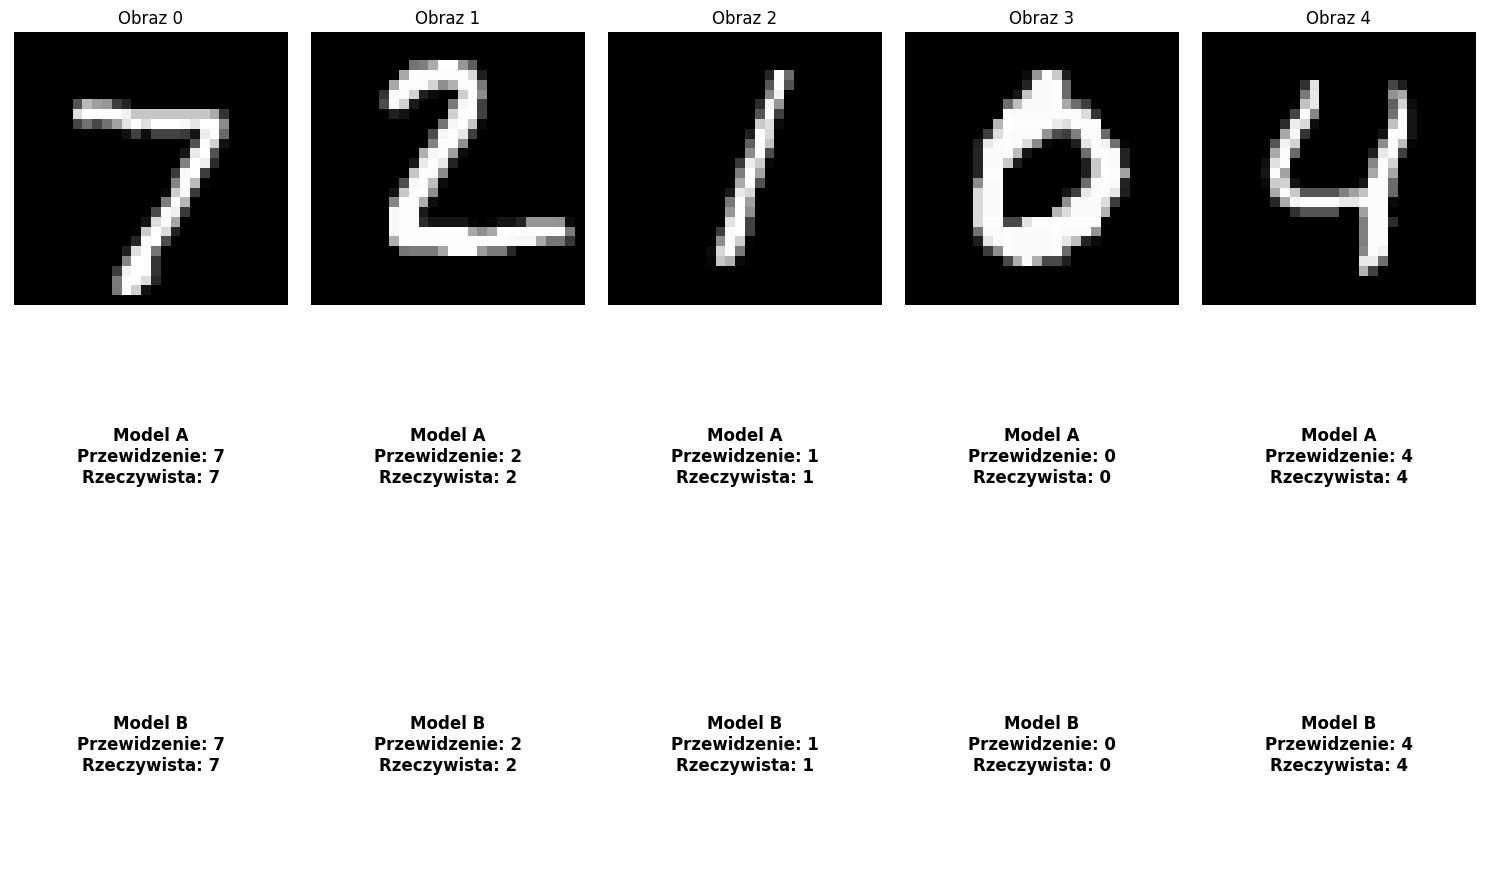

In [ ]:
predictions_A = np.argmax(model_A.predict(x_test[:5]), axis=1)
predictions_B = np.argmax(model_B.predict(x_test[:5]), axis=1)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))

for i in range(5):
    axes[0, i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f"Obraz {i}")
    axes[0, i].axis('off')
    
    # Model A
    axes[1, i].axis('off')
    axes[1, i].text(0.5, 0.5, f"Model A\nPrzewidzenie: {predictions_A[i]}\nRzeczywista: {y_test[i]}", 
                    ha='center', va='center', fontsize=12, fontweight='bold')
    
    # Model B
    axes[2, i].axis('off')
    axes[2, i].text(0.5, 0.5, f"Model B\nPrzewidzenie: {predictions_B[i]}\nRzeczywista: {y_test[i]}", 
                    ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Analiza i wnioski

**Opis zaprojektowanej architektury sieci:**
- **Model A:** Dwie warstwy konwolucyjne (Conv2D: 16 i 32 filtrów, aktywacja ReLU), jedna warstwa MaxPooling, warstwa Flatten, jedna warstwa gęsta (Dense: 32, ReLU), wyjście (Dense: 10, softmax).
- **Model B:** Trzy warstwy konwolucyjne (Conv2D: 32, 64, 128 filtrów, ReLU), dwie warstwy MaxPooling, warstwa Flatten, dwie warstwy gęste (Dense: 64, 128, ReLU), Dropout (0.5), wyjście (Dense: 10, softmax).

**Analiza działania modelu na danych testowych:**
- Przykładowe przewidzenia dla 5 obrazów testowych zostały przedstawione na wykresie.
- Oba modele poprawnie klasyfikują przedstawione przykłady.

**Wnioski dotyczące wpływu architektury CNN na uzyskane wyniki:**
- Model B, dzięki większej liczbie warstw, neuronów oraz zastosowaniu warstwy Dropout, charakteryzuje się większą złożonością i lepszą zdolnością do generalizacji danych. Uzyskał wyższy wynik na zbiorze testowym niż na uczącym, co świadczy o dobrej ogólności. W przypadku modelu A można zaobserwować spadek dokładności na danych testowych względem treningowych, co może wskazywać na przeuczenie.
- Model A jest prostszy, szybciej się uczy, ale może mieć niższą dokładność na trudniejszych danych.
- Rozbudowa architektury (więcej warstw i Dropout) może poprawić wyniki, ale wydłuża czas uczenia.